<a href="https://colab.research.google.com/github/Axl11475581/TensorFlow-Certificate/blob/main/2_1_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook the exercises from the 2.0 - N.N/Classification will be cover.

2. Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.
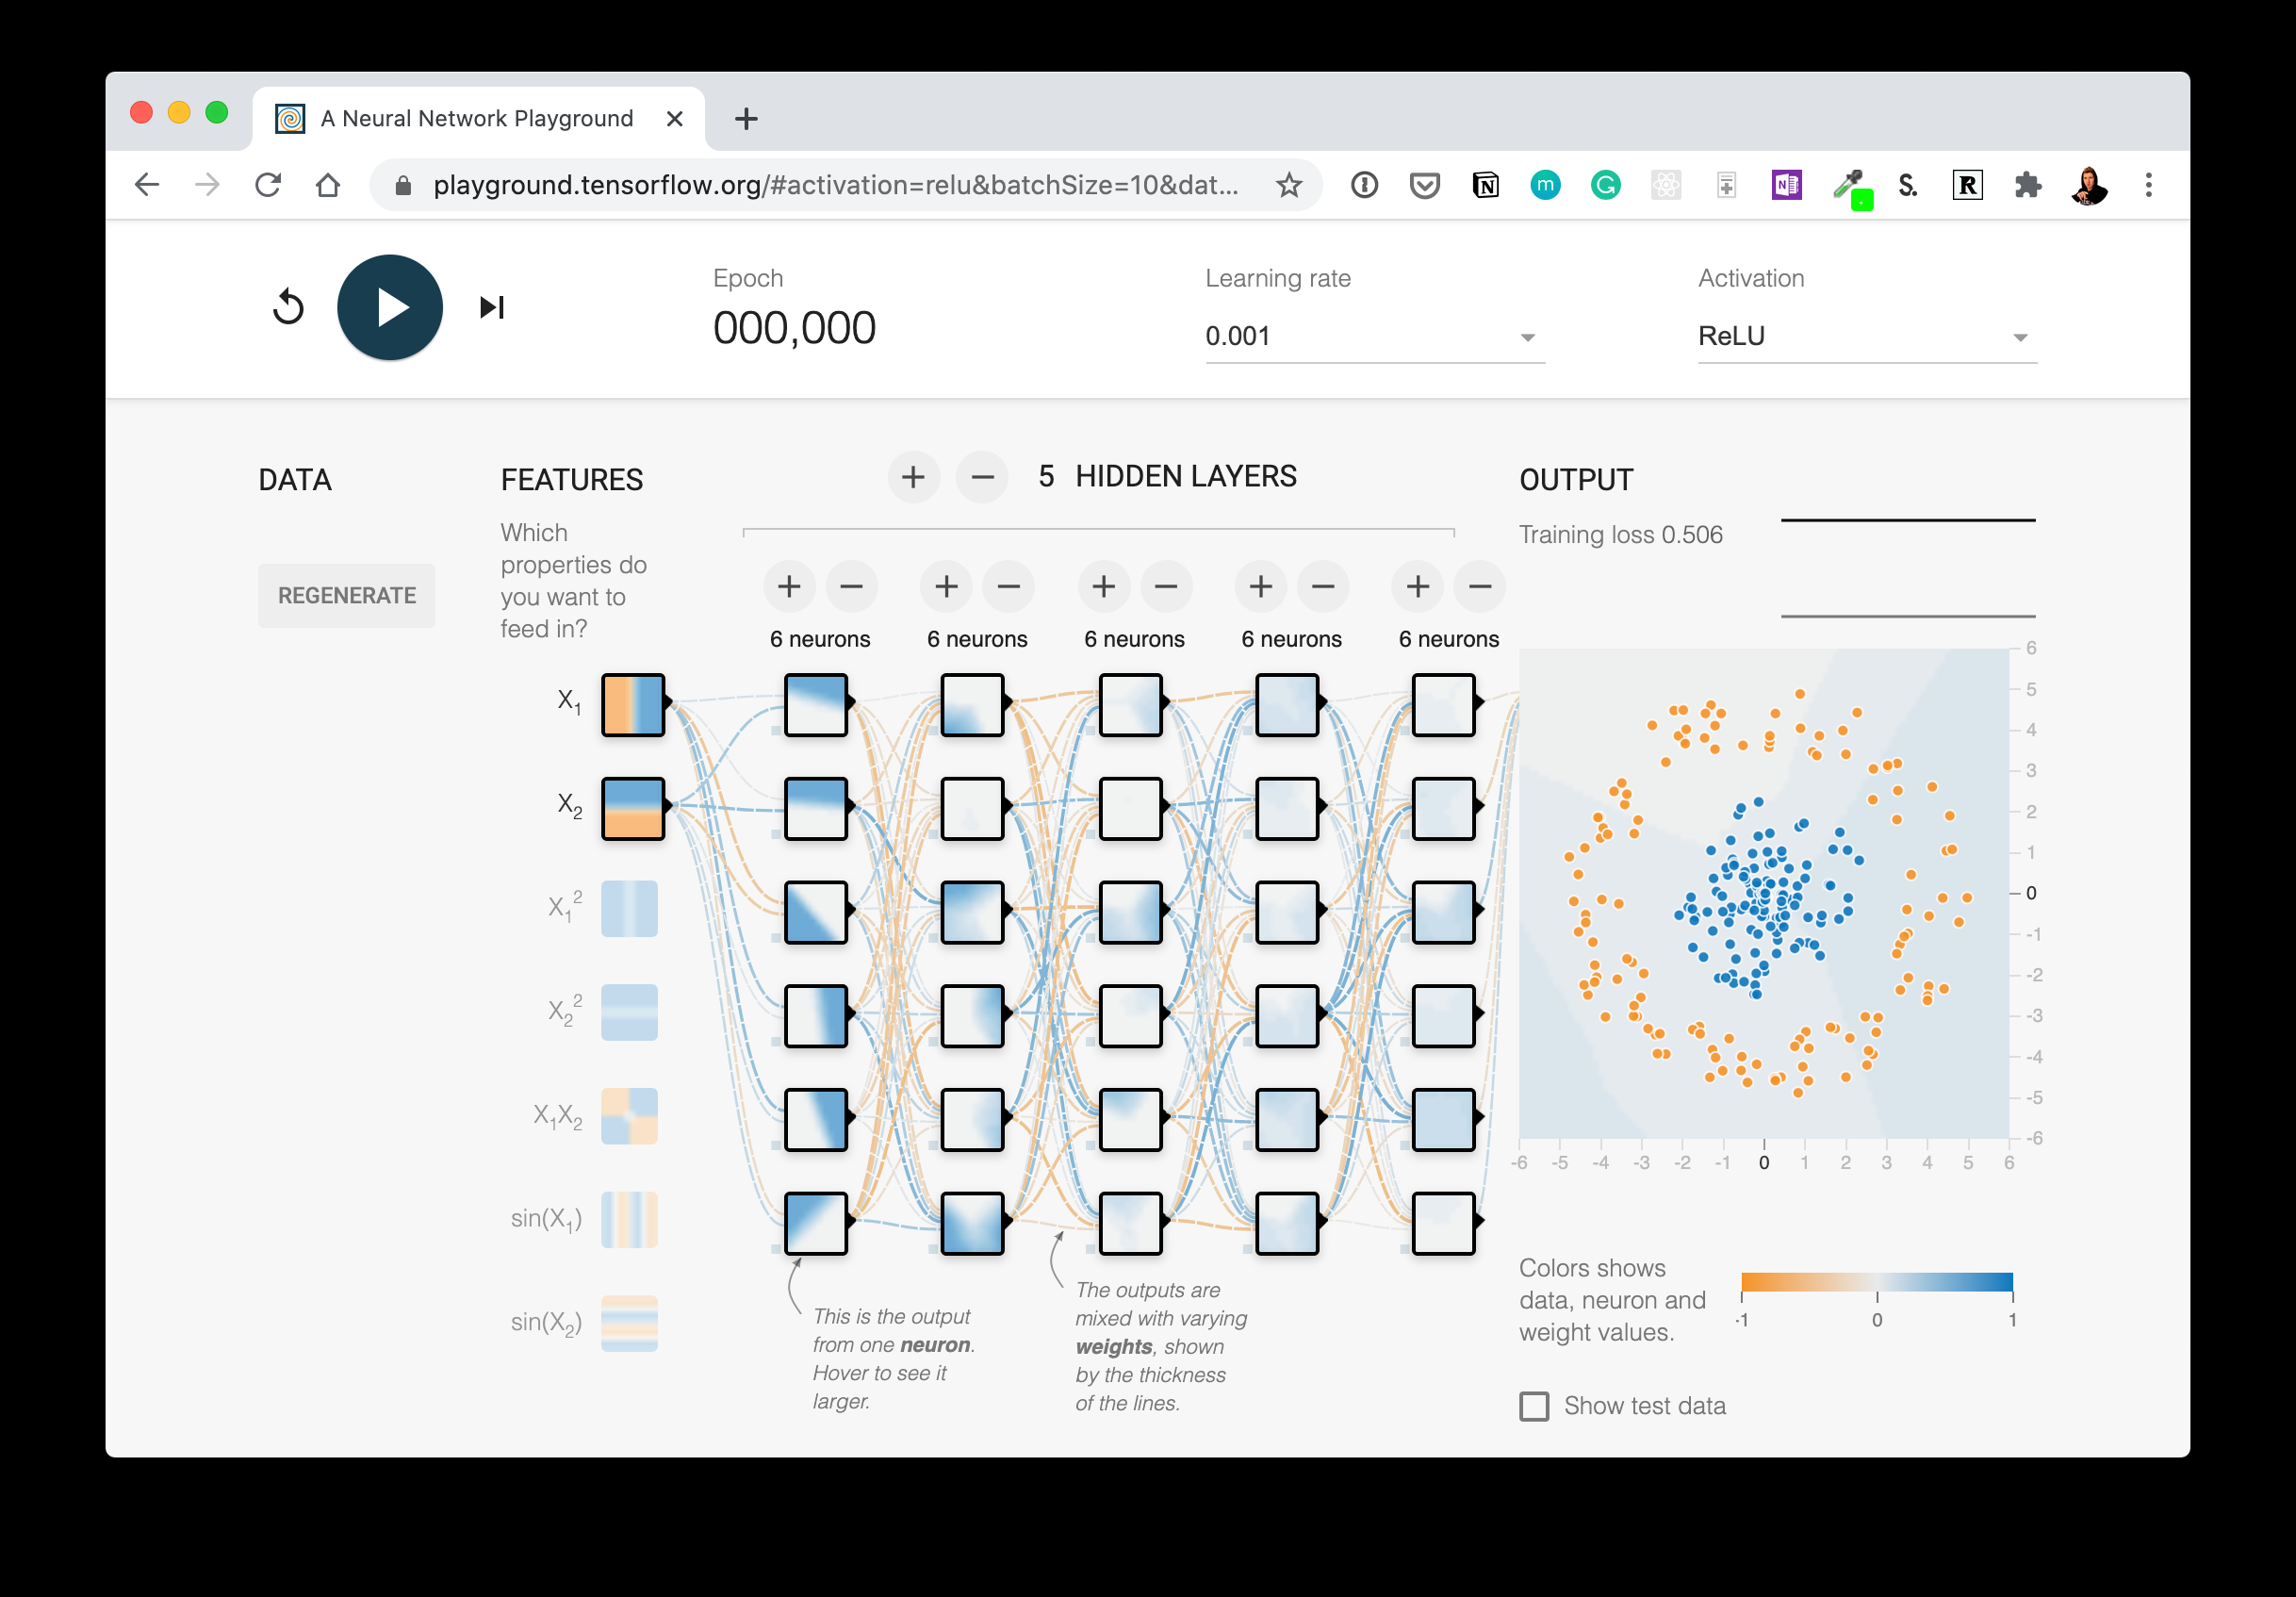

## Creating data to view and fit to the replicated model 

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000
# Create circles
X, y = make_circles (n_samples,
                     noise = 0.03,
                     random_state=43)

In [2]:
# Check features
X

array([[-0.12457009, -0.78591392],
       [ 0.77236991, -0.15825249],
       [-0.65712298,  0.76811447],
       ...,
       [-0.98804879, -0.09211218],
       [-0.62557211, -0.74733274],
       [-0.33522274, -0.69491869]])

In [3]:
# Check labels
y[:10]

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

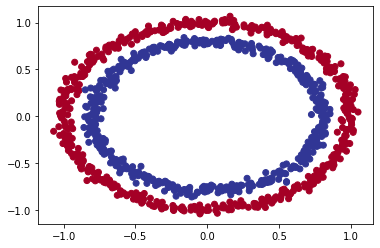

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Modelling

In [5]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.5.0


In [6]:
# Set the random seed for reproductibility
tf.random.set_seed(5)
# 1. Create the model
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(6, activation="sigmoid"),
                               tf.keras.layers.Dense(6, activation="sigmoid"),
                               tf.keras.layers.Dense(6, activation="sigmoid"),
                               tf.keras.layers.Dense(6, activation="sigmoid"),
                               tf.keras.layers.Dense(6, activation="sigmoid"),
                               tf.keras.layers.Dense(1, activation="relu")
])
# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# 3. Fit the model
model_1.fit(X, y, epochs=10)

Epoch 1/10
32/32 [==============================] - 1s 1ms/step - loss: 0.8104 - accuracy: 0.5000
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 0.7209 - accuracy: 0.5000
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6958 - accuracy: 0.5000
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4940
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.4890
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4940
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4910
Epoch 9/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4840


In [7]:
# 4. Evaluate the model
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931509971618652, 0.5]

3. Create a classification dataset using Scikit-Learn's `make_moons()` function, visualize it and then build a model to fit it at over 85% accuracy.

In [13]:
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame

# generate 2d classifiction dataset
X_m, y_m = make_moons(n_samples=1000, noise=0.1)

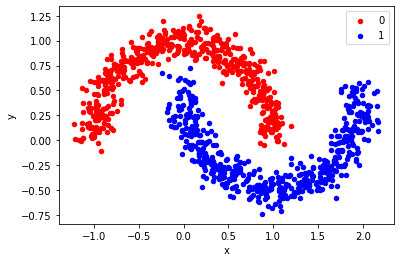

In [14]:
# Visualize dataset
df = DataFrame(dict(x=X_m[:,0], y=X_m[:,1], label=y_m))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
  group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [15]:
# Number of examples in the whole dataset
len(X_m)

1000

In [16]:
# Split the data into train and test sets
X_mtrain, y_mtrain = X_m[:800], y_m[:800] # 80% of data for training
X_mtest, y_mtest = X_m[800:], y[800:] # 20% of data for test

# Shapes of the data
X_mtrain.shape, X_mtest.shape

((800, 2), (200, 2))

In [17]:
# Set the random seed for reproductibility
tf.random.set_seed(5)
# 1. Create the model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(10, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")
])
# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(0.01),
                metrics=["accuracy"])
# 3. Fit the model
model_2.fit(X_mtrain, y_mtrain, epochs=50)

Epoch 1/50
25/25 [==============================] - 0s 1ms/step - loss: 0.3763 - accuracy: 0.8400
Epoch 2/50
25/25 [==============================] - 0s 1ms/step - loss: 0.2366 - accuracy: 0.8788
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.1822 - accuracy: 0.9050
Epoch 4/50
25/25 [==============================] - 0s 1ms/step - loss: 0.0912 - accuracy: 0.9750
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0373 - accuracy: 0.9937
Epoch 6/50
25/25 [==============================] - 0s 1ms/step - loss: 0.0166 - accuracy: 0.9987
Epoch 7/50
25/25 [==============================] - 0s 1ms/step - loss: 0.0205 - accuracy: 0.9962
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0127 - accuracy: 0.9962
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 0.9987
Epoch 10/50
25/25 [==============================] - 0s 1ms/step - loss: 0.0080 - accuracy: 0.9975
Epoch 11/50
25/25 [

In [18]:
# Evaluate model on the test set
loss, accuracy = model_2.evaluate(X_mtest, y_mtest)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 6.7891 - accuracy: 0.5050
Model loss on the test set: 6.789092540740967
Model accuracy on the test set: 50.50%
